<a href="https://colab.research.google.com/github/swethanjali24/knn-assignment/blob/main/Email_spam_detection_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score


In [ ]:
# importing the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/KNN/emails.csv')


In [ ]:
# Knowing the data
df.head() # all are numerical columns except the 'Email No.' which is not needed for our model, hence we ignore.
df.tail()
df['Prediction'].value_counts()# imbalanced data

,count
Prediction,
0,3672
1,1500


In [ ]:
# EDA
df.isnull().sum().any()# no null values
df.duplicated().sum()# no duplicate values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:

# Separating the input and output
X=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']


In [ ]:
# Preprocessing the input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
# performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
# Iterating for best value of K
from sklearn.model_selection import cross_val_score
k_scores=[]
k_range=range(1,60)

for k in k_range:
 knn=KNeighborsClassifier(n_neighbors=k)
 scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
 k_scores.append(scores.mean())



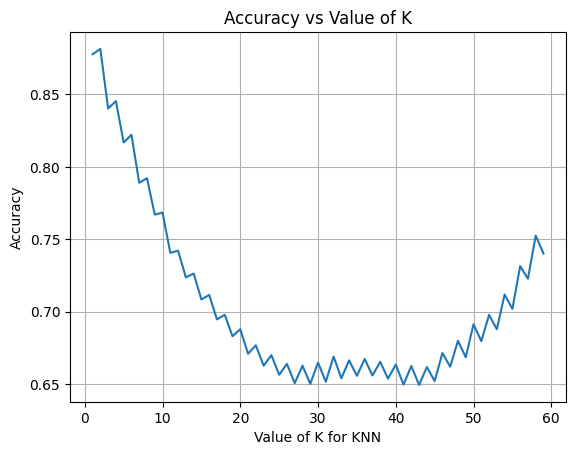

In [ ]:
# Plotting the value of K vs accuracy

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of K')
plt.grid()
plt.show()

In [ ]:
# here K=1 shows the highest accuracy, so we will test our data with K=1
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predicting the data
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [ ]:
# Evaluating the performance of the model
from sklearn import metrics
print('Training Accuracy:',np.round(accuracy_score(y_train,y_train_pred),3))
print('Training precision:',np.round(metrics.precision_score(y_train,y_train_pred),3))
print('Training recall:',np.round(metrics.recall_score(y_train,y_train_pred),3))
print('Training f1-score:',np.round(metrics.f1_score(y_train,y_train_pred),3))
print('Training confusion matrix:\n',confusion_matrix(y_train,y_train_pred))

print('Testing Accuracy:',np.round(accuracy_score(y_test,y_test_pred),3))
print('Testing precision:',np.round(metrics.precision_score(y_test,y_test_pred),3))
print('Testing recall:',np.round(metrics.recall_score(y_test,y_test_pred),3))
print('Testing f1-score:',np.round(metrics.f1_score(y_test,y_test_pred),3))
print('Testing confusion matrix:\n',confusion_matrix(y_test,y_test_pred))

Training Accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training f1-score: 1.0
Training confusion matrix:
 [[2964    0]
 [   0 1173]]
Testing Accuracy: 0.903
Testing precision: 0.811
Testing recall: 0.905
Testing f1-score: 0.855
Testing confusion matrix:
 [[639  69]
 [ 31 296]]


In [ ]:
# Is is a good model as precision and recall score are above 80% for test data, but it is slighlty overfitting,we shall try with K=3 and see if test accuracy is improving or not.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [ ]:
print('Training Accuracy:',np.round(accuracy_score(y_train,y_train_pred),3))
print('Training precision:',np.round(metrics.precision_score(y_train,y_train_pred),3))
print('Training recall:',np.round(metrics.recall_score(y_train,y_train_pred),3))
print('Training f1-score:',np.round(metrics.f1_score(y_train,y_train_pred),3))
print('Training confusion matrix:\n',confusion_matrix(y_train,y_train_pred))

print('Testing Accuracy:',np.round(accuracy_score(y_test,y_test_pred),3))
print('Testing precision:',np.round(metrics.precision_score(y_test,y_test_pred),3))
print('Testing recall:',np.round(metrics.recall_score(y_test,y_test_pred),3))
print('Testing f1-score:',np.round(metrics.f1_score(y_test,y_test_pred),3))
print('Testing confusion matrix:\n',confusion_matrix(y_test,y_test_pred))

Training Accuracy: 0.932
Training precision: 0.825
Training recall: 0.963
Training f1-score: 0.889
Training confusion matrix:
 [[2725  239]
 [  43 1130]]
Testing Accuracy: 0.882
Testing precision: 0.757
Testing recall: 0.924
Testing f1-score: 0.832
Testing confusion matrix:
 [[611  97]
 [ 25 302]]


In [ ]:
# Here f1 score is decreasing so we prefer K=1 model, now we will try for K=59 also showing high accuracy ,here K is high and since there would be smooth presence, we shall try once.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=59)

In [ ]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [ ]:
# Evaluating the performance of the model
from sklearn import metrics
print('Training Accuracy:',np.round(accuracy_score(y_train,y_train_pred),3))
print('Training precision:',np.round(metrics.precision_score(y_train,y_train_pred,average='weighted'),3))
print('Training recall:',np.round(metrics.recall_score(y_train,y_train_pred,average='weighted'),3))
print('Training f1-score:',np.round(metrics.f1_score(y_train,y_train_pred,average='weighted'),3))
print('Training confusion matrix:\n',confusion_matrix(y_train,y_train_pred))

print('Testing Accuracy:',np.round(accuracy_score(y_test,y_test_pred),3))
print('Testing precision:',np.round(metrics.precision_score(y_test,y_test_pred,average='weighted'),3))
print('Testing recall:',np.round(metrics.recall_score(y_test,y_test_pred,average='weighted'),3))
print('Testing f1-score:',np.round(metrics.f1_score(y_test,y_test_pred,average='weighted'),3))
print('Testing confusion matrix:\n',confusion_matrix(y_test,y_test_pred))

Training Accuracy: 0.667
Training precision: 0.833
Training recall: 0.667
Training f1-score: 0.679
Training confusion matrix:
 [[1616 1348]
 [  31 1142]]
Testing Accuracy: 0.686
Testing precision: 0.832
Testing recall: 0.686
Testing f1-score: 0.692
Testing confusion matrix:
 [[389 319]
 [  6 321]]


In [ ]:
# with K=59 accuarcy or f1 score has drastically reduced, hence finally we proceed with K=1.

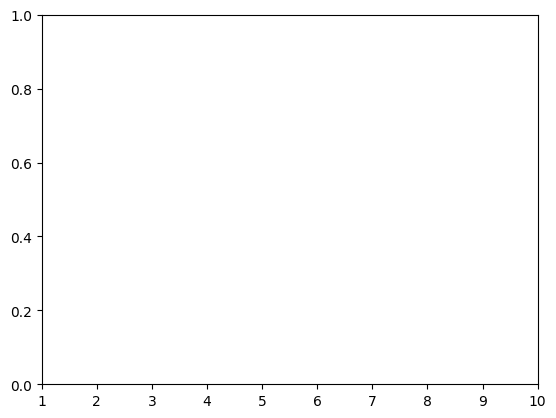

In [ ]:
plt.xlim(1, 10)  # Zoom to this range of k
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
import matplotlib.ticker as ticker
